<a href="https://colab.research.google.com/github/SinghNavnoor/Classification_prediction_of_income/blob/main/classification_of_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Cleaning

Navnoor Singh Kahlon

### Importing Data

In [1]:
import pandas as pd

column_names = ["age","workclass","fnlwgt","education","educational-num", "marital-status",'occupation',"relationship","race","gender,capital-gain","capital-loss","hours-per-week","native-country","income"]
df = pd.read_csv('adult_2.csv',header=0)

df.head()

,adultage,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Looking at the shape of the dataset.

In [2]:
df.shape

(48842, 15)

In [3]:
print(df.columns)

Index(['adultage', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


Shape is showing us that there is only one column.
Need to define the first row as the column names.

In [6]:
column_names = ["age","workclass","fnlwgt","education","educational-num", "marital-status",'occupation',"relationship","race","gender,capital-gain","capital-loss","hours-per-week","native-country","income"]

,,,,,,,,,,,,,,adult
age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K


### Looking for duplicates

In [ ]:
#summing the total number of duplicates
df.duplicated().sum()


1

In [ ]:
#dropping all duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#confirming no more duplicates exist in the dataset
df.duplicated().sum()

0

### Confirming dtypes are correct. 

In [ ]:
df.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9614 entries, 0 to 9614
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              9614 non-null   int64  
 1   workclass        9614 non-null   object 
 2   fnlwgt           9614 non-null   int64  
 3   education        9614 non-null   object 
 4   educational-num  9614 non-null   int64  
 5   marital-status   9614 non-null   object 
 6   occupation       9614 non-null   object 
 7   relationship     9614 non-null   object 
 8   race             9613 non-null   object 
 9   gender           9613 non-null   object 
 10  capital-gain     9613 non-null   float64
 11  capital-loss     9613 non-null   float64
 12  hours-per-week   9613 non-null   float64
 13  native-country   9613 non-null   object 
 14  income           9613 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 1.2+ MB


- Income needs to be int64.  

In [ ]:
df['income'].value_counts()

<=50K    7355
>50K     2258
Name: income, dtype: int64

#### We can look at the Income column as a binary categorical column. 
- 0 representing incomes less than or equal to 50K
- 1 representing incomes greater than 50K

#### Going to keep Income, our target column, object type. 

### Looking for missing values.

In [ ]:
df.isna().sum()
#no missing values

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               1
gender             1
capital-gain       1
capital-loss       1
hours-per-week     1
native-country     1
income             1
dtype: int64

### Looking for any inconsistencies 

#### Inconsistencies in Object type column

In [ ]:
#Looping through all the columns and looking for any inconsistencies.
all_columns = df.columns
data_types = df.dtypes

for i in all_columns:
  if df[i].dtypes == object:
    print(f'The count values for {i} are:')
    print(df[i].value_counts())
    print('-----------------------------------------------')
    print('\n___')

The count values for workclass are:
Private             6573
Self-emp-not-inc     782
Local-gov            609
?                    584
State-gov            429
Self-emp-inc         353
Federal-gov          279
Without-pay            4
Never-worked           1
Name: workclass, dtype: int64
-----------------------------------------------

___
The count values for education are:
HS-grad         3121
Some-college    2125
Bachelors       1597
Masters          545
Assoc-voc        412
11th             358
Assoc-acdm       315
10th             273
7th-8th          186
Prof-school      146
9th              143
12th             121
Doctorate        106
5th-6th           98
1st-4th           48
Preschool         20
Name: education, dtype: int64
-----------------------------------------------

___
The count values for marital-status are:
Married-civ-spouse       4307
Never-married            3237
Divorced                 1303
Widowed                   330
Separated                 298
Married-sp

#### Three object type columns have '?' as one of their class types. This could be considered null values. 
#### I will be turning "?" into np.nan and then that will be imputed accordingly during the model building. 
##### Columns I will be creating null values for are:
- **occupation**
- **workclass**
- **native-country**

In [ ]:
#importing numpy
import numpy as np

#changing "?" to np.nan for workclass
df['workclass'] = df['workclass'].replace({'?': np.nan})
#changing "?" to np.nan for occupation
df['occupation'] = df['occupation'].replace({'?': np.nan})
#changing "?" to np.nan for native-country
df['native-country'] = df['native-country'].replace({'?': np.nan})

In [ ]:
#confirming the changes have made for workclass, occupation and native-country
df.isna().sum()

age                  0
workclass          584
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation         585
relationship         0
race                 1
gender               1
capital-gain         1
capital-loss         1
hours-per-week       1
native-country     165
income               1
dtype: int64

- **Now we have actual missing values that will be handled during model building.**

- **We do not have any inconsistencies in the Object type columns.**

#### Inconsistencies in Numeric type column

In [ ]:
#Looping through all the columns and looking for any inconsistencies.
all_columns = df.columns
data_types = df.dtypes

for i in all_columns:
  if df[i].dtypes == 'int64':
    print(f'The count values for {i} are:')
    print(df[i].value_counts())
    print('-----------------------------------------------')
    print('\n___')

The count values for age are:
23    276
36    276
33    272
35    265
37    265
     ... 
79      2
82      2
85      2
84      2
89      1
Name: age, Length: 71, dtype: int64
-----------------------------------------------

___
The count values for fnlwgt are:
48520     7
125892    7
120277    6
186934    6
53956     6
         ..
256278    1
175537    1
122988    1
382688    1
127728    1
Name: fnlwgt, Length: 8224, dtype: int64
-----------------------------------------------

___
The count values for educational-num are:
9     3121
10    2125
13    1597
14     545
11     412
7      358
12     315
6      273
4      186
15     146
5      143
8      121
16     106
3       98
2       48
1       20
Name: educational-num, dtype: int64
-----------------------------------------------

___


- **There are no inconsistencies in the numeric columns**

### Summary stats

In [ ]:
#Creating another loop to get the summary stats of Numerical columns. 
for i in all_columns:
  if df[i].dtypes == int:
    m = df[i].mean()
    max = df[i].max()
    min = df[i].min()
    mode = df[i].mode()
    print(f"{df[i].name.capitalize()}:")
    print(f'Mean = {m}, Max = {max}, Min = {min}')
    print('--------------' * 4)
    print('\n')

Age:
Mean = 38.73392968587476, Max = 90, Min = 17
--------------------------------------------------------


Fnlwgt:
Mean = 188287.40732265447, Max = 1490400, Min = 13769
--------------------------------------------------------


Educational-num:
Mean = 10.079987518202621, Max = 16, Min = 1
--------------------------------------------------------




- No visible inconsistencies in the numeric columns. 

## Exploratory Visualizations

### Univariate Visualizations

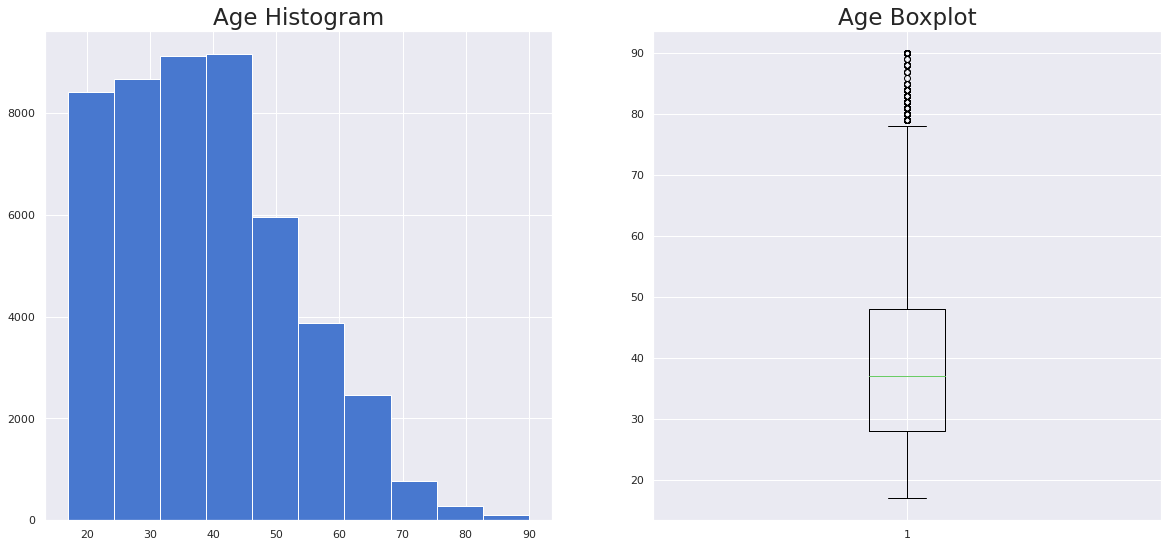

In [ ]:
import matplotlib.pyplot as plt
#Setting the figure size:
plt.figure(figsize = (20,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['age'].values);
plt.title('Age Histogram', fontsize=23);

#Boxplot
plt.subplot(1, 2, 2);
plt.boxplot(df['age'].values);
plt.title('Age Boxplot', fontsize=23);

- Age histogram is right skewed. This is explainable as more humans live around 60-70 years of age. 
- In the boxplot, we can see that after the age of 77 we have outliers that go all the way up to 90 years. 

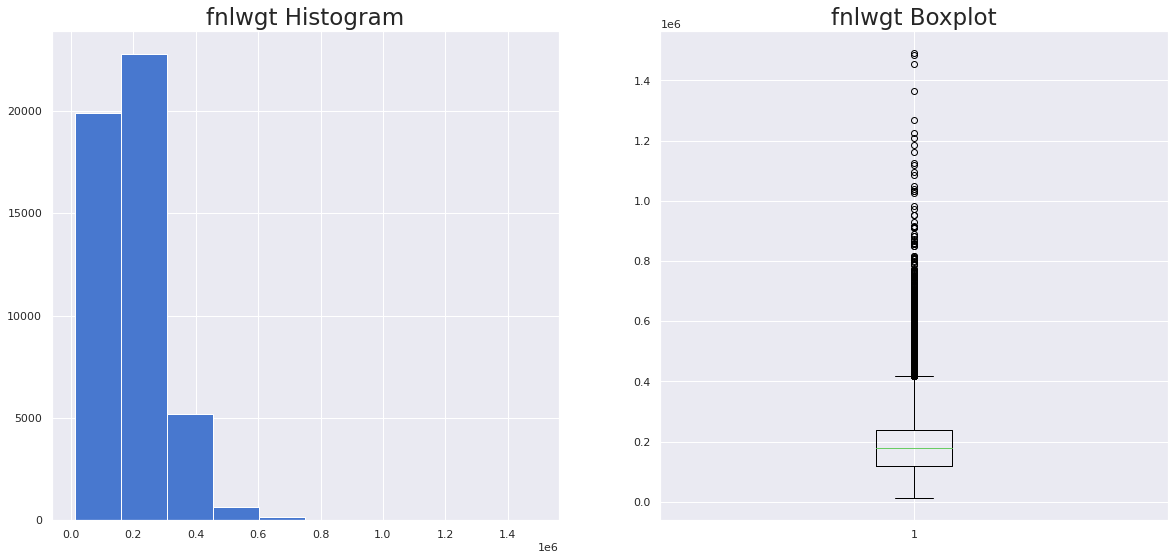

In [ ]:
#Setting the figure size:
plt.figure(figsize = (20,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['fnlwgt'].values);
plt.title('fnlwgt Histogram', fontsize=23);

#Boxplot
plt.subplot(1, 2, 2);
plt.boxplot(df['fnlwgt'].values);
plt.title('fnlwgt Boxplot', fontsize=23);

- The fnlwgt is heavily right skewed. 
- The boxplot has many outliers. 
- There were no explanations of what this column is about. I think it talks about financial weight, but I dont know what that means. Dropping this column should be the best decision.

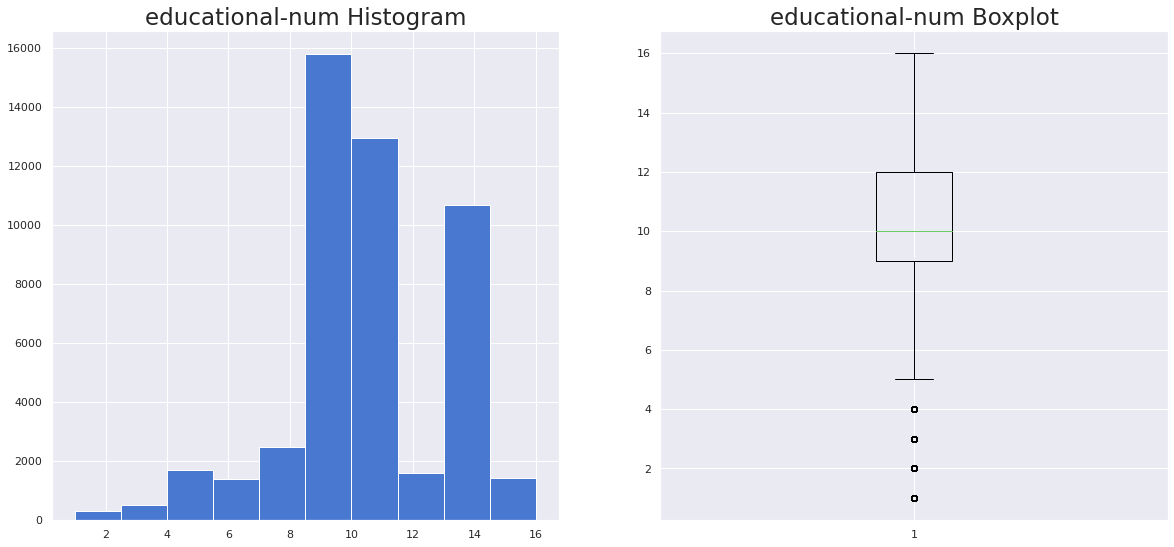

In [ ]:
#Setting the figure size:
plt.figure(figsize = (20,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['educational-num'].values);
plt.title('educational-num Histogram', fontsize=23);

#Boxplot
plt.subplot(1, 2, 2);
plt.boxplot(df['educational-num'].values);
plt.title('educational-num Boxplot', fontsize=23);

- I feel like with Educational-number we are talking about for how many years a person has received an education. However that was never clarified in the dartaet.  
- The histogram is well within the reality that most people get about 10 - 14 years of education. 
- The outliers in the boxplot shows us that some individuals only received about 1 - 4 years of education. It will be interesting to know what countries is that for. 

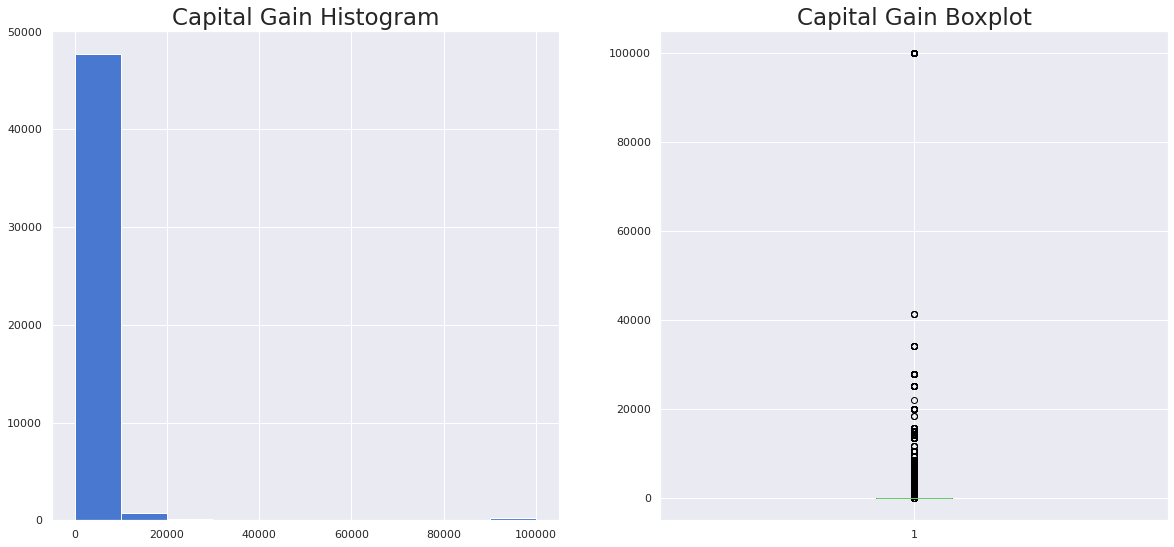

In [ ]:
#Setting the figure size:
plt.figure(figsize = (20,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['capital-gain'].values);
plt.title('Capital Gain Histogram', fontsize=23);

#Boxplot
plt.subplot(1, 2, 2);
plt.boxplot(df['capital-gain'].values);
plt.title('Capital Gain Boxplot', fontsize=23);

- Capital gains have majority of its values at 0. Even though we can say that this column should be dropped I think that the model can learn an important thing about income inequality. 
- In the boxplot, we can see that the outliears are spread very wide. This confirms the idea of income inequality as well. 

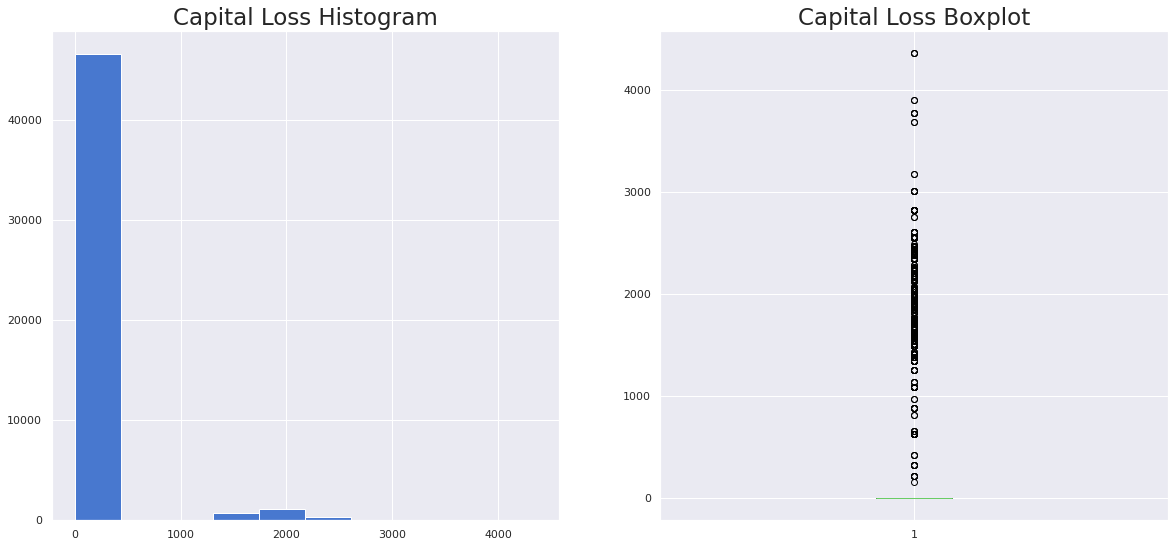

In [ ]:
#Setting the figure size:
plt.figure(figsize = (20,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['capital-loss'].values);
plt.title('Capital Loss Histogram', fontsize=23);

#Boxplot
plt.subplot(1, 2, 2);
plt.boxplot(df['capital-loss'].values);
plt.title('Capital Loss Boxplot', fontsize=23);

- The histogram shows us that most people did not have a capital loss, maybe because they never had any capital gain. 
- The boxplot shows us a better picture of the outliers of the amount of capital loss individuals had.  

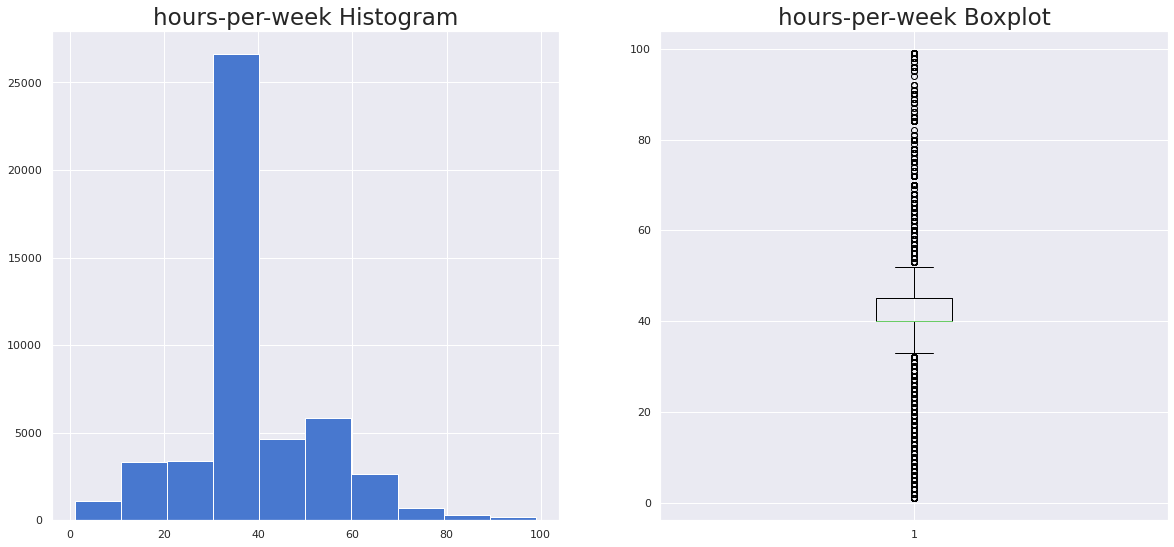

In [ ]:
#Setting the figure size:
plt.figure(figsize = (20,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['hours-per-week'].values);
plt.title('hours-per-week Histogram', fontsize=23);

#Boxplot
plt.subplot(1, 2, 2);
plt.boxplot(df['hours-per-week'].values);
plt.title('hours-per-week Boxplot', fontsize=23);

- The histogram is normally distributed with a peak at 40. 
- However, the boxplot shows us that the number of hours work differ a lot. The outliers go far and wide above and below the boxplot. 

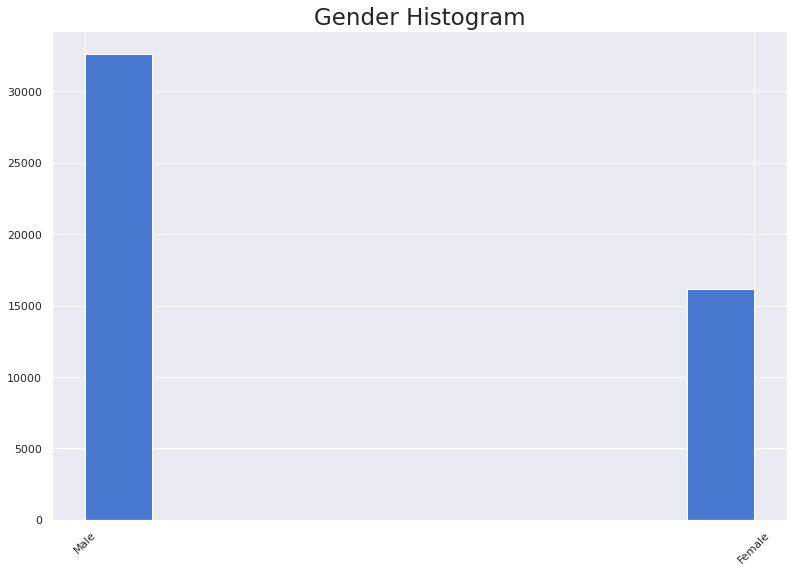

In [ ]:
#Setting the figure size:
plt.figure(figsize = (29,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['gender'].values);
plt.title('Gender Histogram', fontsize=23);
plt.xticks(rotation = 45);

- Most of the sample consists of men. 
- The sampling of women is half of men. 

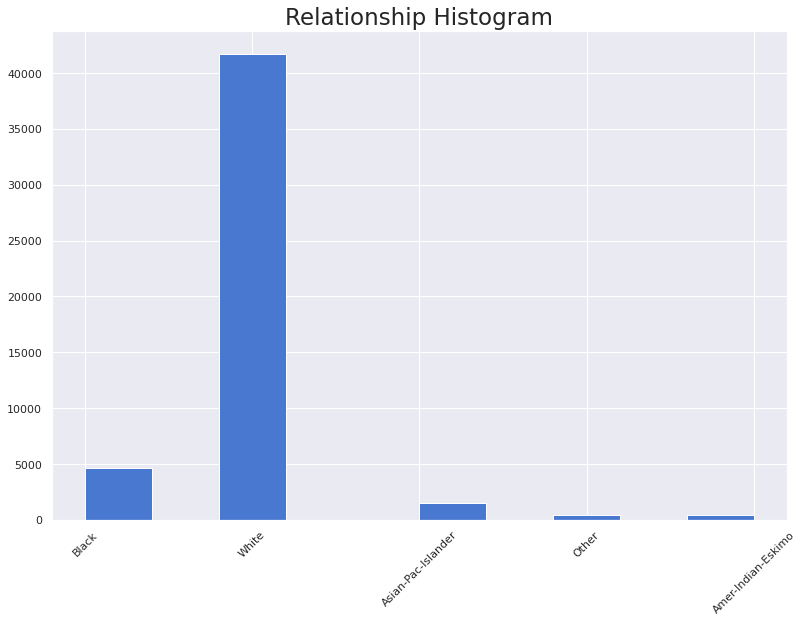

In [ ]:
#Setting the figure size:
plt.figure(figsize = (29,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['race'].values);
plt.title('Relationship Histogram', fontsize=23);
plt.xticks(rotation = 45);

- This shows us that the dataset is overwhelmed by people of White race. This could be a problem as we won't have a model that can predict from a wide range of races. 

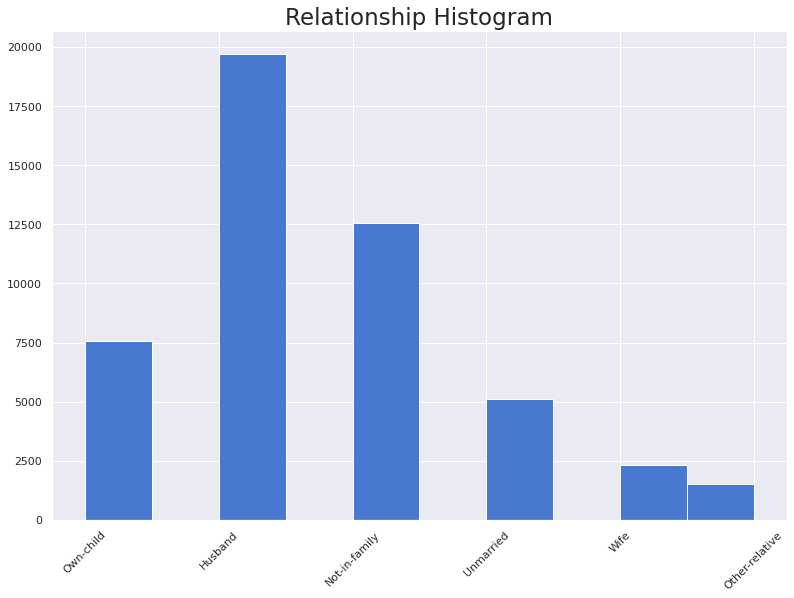

In [ ]:
#Setting the figure size:
plt.figure(figsize = (29,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['relationship'].values);
plt.title('Relationship Histogram', fontsize=23);
plt.xticks(rotation = 45);

- Majority of the sampled individuals are either husbands or Not in family type. 

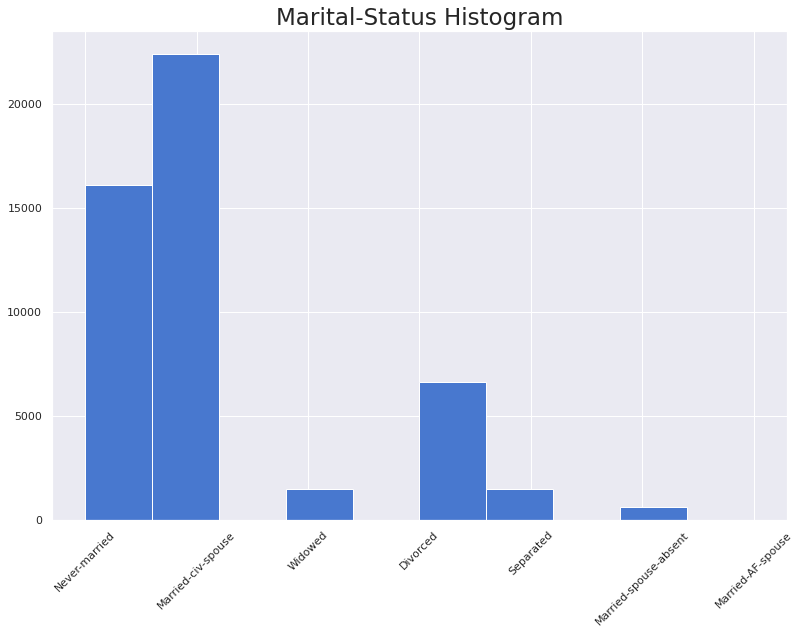

In [ ]:
#Setting the figure size:
plt.figure(figsize = (29,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['marital-status'].values);
plt.title('Marital-Status Histogram', fontsize=23);
plt.xticks(rotation = 45);

- Majority of the samples we have are of people who have either never married or Married-civ-spouse.

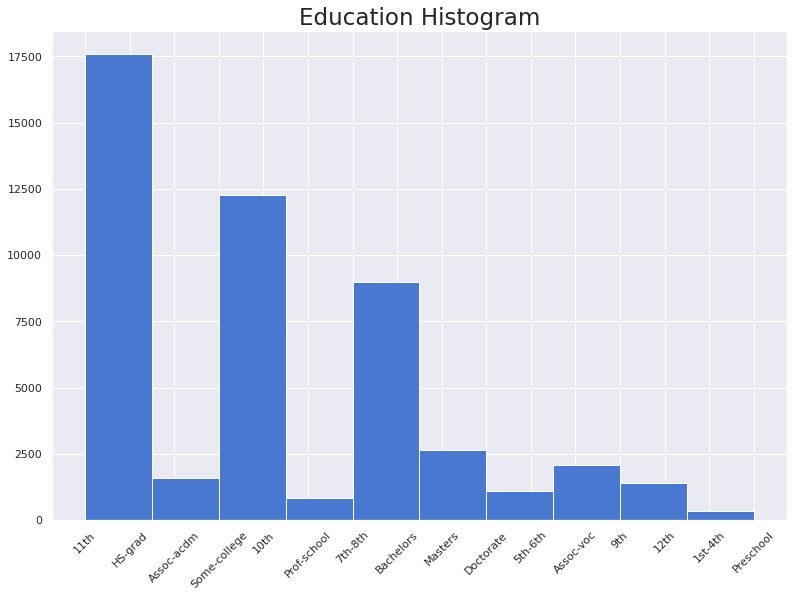

In [ ]:
#Setting the figure size:
plt.figure(figsize = (29,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['education'].values);
plt.title('Education Histogram', fontsize=23);
plt.xticks(rotation = 45);

- The education histogram is very interesting because the number of people with different education levels vary alot. 

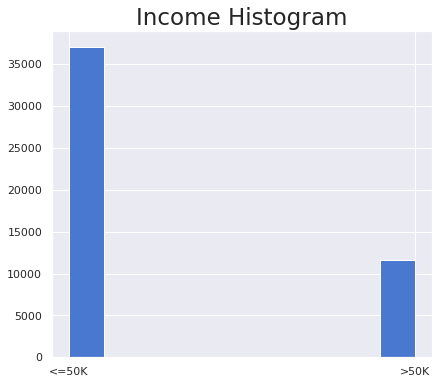

In [ ]:
#Setting the figure size:
plt.figure(figsize = (15,6))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['income'].values);
plt.title('Income Histogram', fontsize=23);


- The histogram of the target column shows us that most indiviuals make below 50 thousand dollars. 
- Individuals who make more than 50 thousand dollars are one third of its counterpart. 

## Multi-variate Exploration

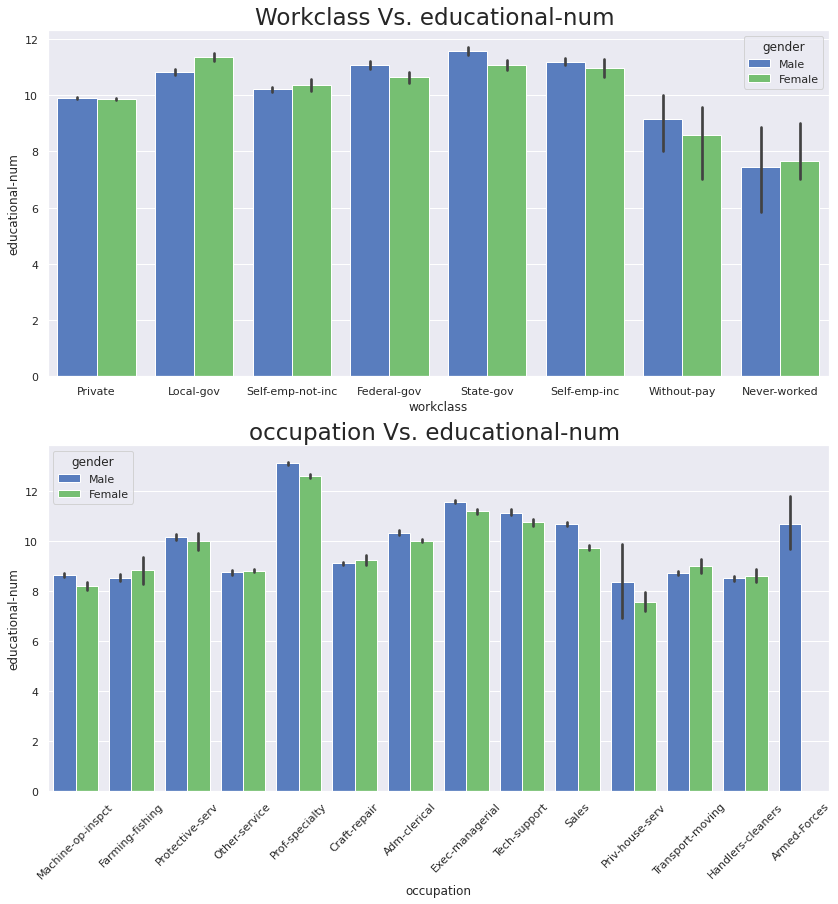

In [ ]:
import seaborn as sns
#Setting the figure size:
plt.figure(figsize = (14,14))

#Barplot
plt.subplot(2, 1, 1);
sns.barplot(x = 'workclass', y = 'educational-num', hue = 'gender', data = df);
plt.title('Workclass Vs. educational-num ', fontsize= 23);

#Barplot
plt.subplot(2, 1, 2);
sns.barplot(x = 'occupation', y = 'educational-num',hue = 'gender', data = df);
plt.title('occupation Vs. educational-num ', fontsize= 23);
plt.xticks(rotation = 45);



- For most workclasses and occupations the number of years of education between men and women are a mix. 
- The biggest outlier is the education number for Armed Forces. This data suggests that women don't have any education in this field which does not seem to be true.

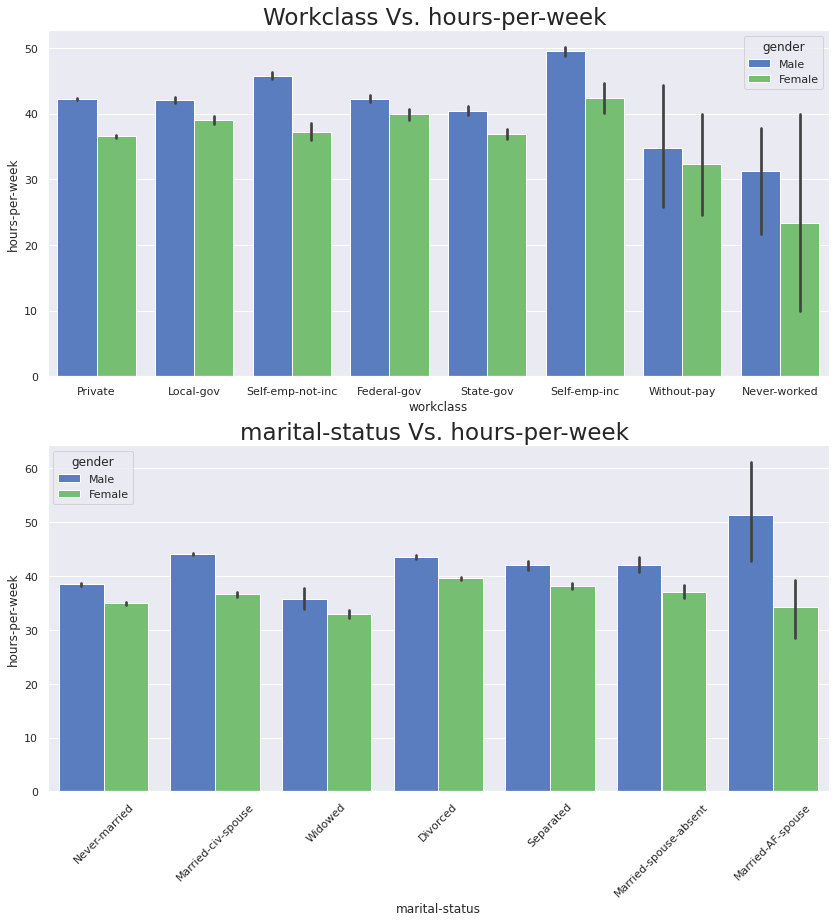

In [ ]:
#Setting the figure size:
plt.figure(figsize = (14,14))

#Barplot
plt.subplot(2, 1, 1);
sns.barplot(x = 'workclass', y = 'hours-per-week', hue = 'gender', data = df);
plt.title('Workclass Vs. hours-per-week ', fontsize= 23);

#Barplot
plt.subplot(2, 1, 2);
sns.barplot(x = 'marital-status', y = 'hours-per-week',hue = 'gender', data = df);
plt.title('marital-status Vs. hours-per-week ', fontsize= 23);
plt.xticks(rotation = 45);

- Looks like in every profession men worked more hours than women. 
- In every martial status, as well, men worked more hours. 
- This also could be because women have to take care of the family and do household chores. 

## **Explanatory Visualization**

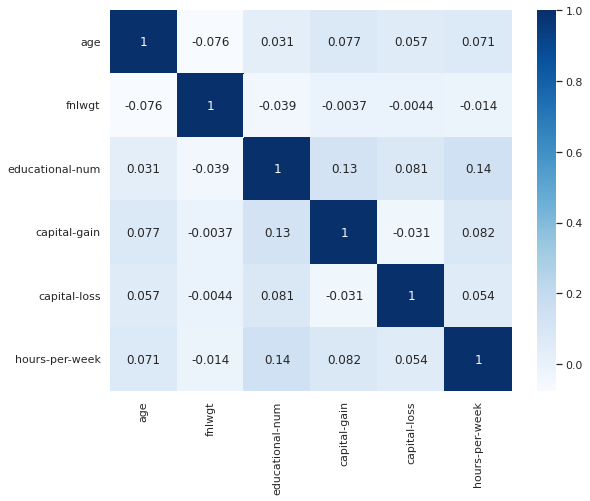

In [ ]:
corr = df.corr()
#importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
#Graphing the calculated correlation. 
sns.set(rc = {'figure.figsize' : (9,7)});
sns.heatmap(corr, cmap = 'Blues', annot = True);
plt.savefig('heatmap_of_correlation_final5.png',bbox_inches = "tight", dpi = 'figure', transparent = False)


- **Columns have very weak positive and negative correlation.** 

- **We must also remember that correlation does not mean causation.** 

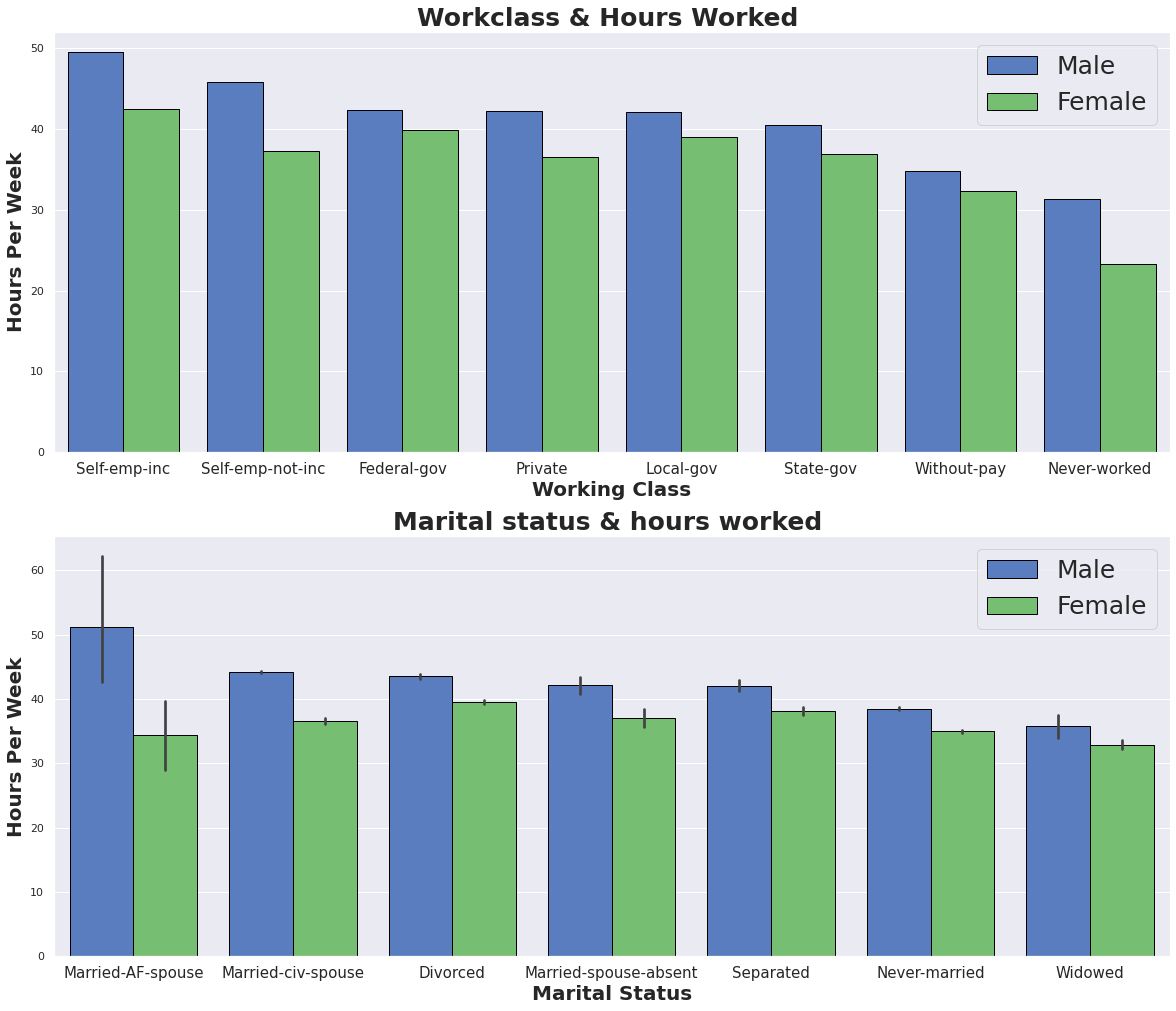

In [ ]:
#Selecting a figure size for the graph:
plt.figure(figsize = (20,17))

#creating a suplot
plt.subplot(2, 1, 1)

#setting the format style. 
plt.ticklabel_format(style='plain', axis='y')
plt.style.use('seaborn-muted')

#Barplot 1 
sns.barplot(x = 'workclass', y = 'hours-per-week', 
            hue = 'gender', data = df, ci=None, edgecolor='black', order = ['Self-emp-inc','Self-emp-not-inc', 'Federal-gov','Private','Local-gov','State-gov','Without-pay','Never-worked'])

#Making the graph more presentable:
plt.title('Workclass & Hours Worked ', fontsize= 25, fontweight='bold')
plt.xlabel('Working Class', fontsize=20, fontweight='bold')
plt.ylabel('Hours Per Week', fontsize=20, fontweight='bold')
plt.xticks(rotation = 0, fontsize = 15)
plt.legend(fontsize = 25);

#creating a suplot
plt.subplot(2, 1, 2)

#Barplot
sns.barplot(x = 'marital-status', y = 'hours-per-week',hue = 'gender', data = df,  edgecolor='black',
            order = ['Married-AF-spouse','Married-civ-spouse','Divorced','Married-spouse-absent','Separated','Never-married','Widowed']);

#Making the graph more presentable:
plt.title('Marital status & hours worked ', fontsize= 25,fontweight='bold')
plt.xlabel('Marital Status', fontsize=20,fontweight='bold')
plt.ylabel('Hours Per Week', fontsize=20, fontweight='bold')
plt.xticks(rotation = 0, fontsize = 15)
plt.legend(fontsize = 25);

plt.savefig('workclass_maritalStatus_Hours_worked.png',bbox_inches = "tight", dpi = 'figure', transparent = False)



### **Observations:**
- **In Marital and Workclass status men have worked more hours than women.**
- **This shows us that men still get more freedom when it comes to working on their career over women.**
- **We can also conclude that women take higher responsibilities like taking care of their children and of the household over men.**


### **White - Male Bias**

#### **Male Bias**

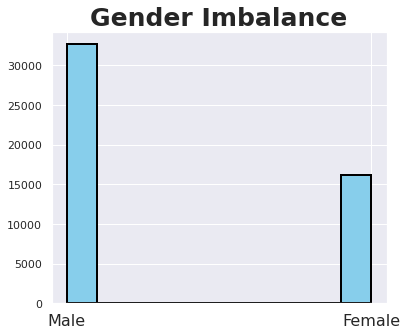

In [ ]:
import seaborn as sns
#Setting the figure size
plt.figure(figsize = (6,5))

#Selecting a style for the graph
plt.style.use('seaborn-muted')

#Histogram
plt.hist(df['gender'].values, color = 'skyblue', ec="black", lw = 2)
plt.title('Gender Imbalance', fontsize=25, fontweight='bold')
plt.xticks(fontsize = 16);

plt.savefig('gender_imbalance.png',bbox_inches = "tight", dpi = 'figure', transparent = False)


#### **White Race Bias**

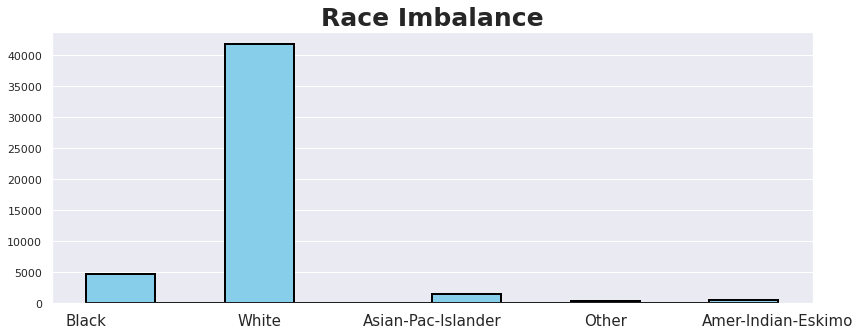

In [ ]:
#Setting the figure size:
plt.figure(figsize = (30,5))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['race'].values, color = 'skyblue', ec="black", lw=2);
plt.title('Race Imbalance', fontsize=25,fontweight='bold');
plt.xticks(fontsize=15);
#Customing the graph for presentation:
plt.grid(axis = 'x');
plt.savefig('race_imbalance.png',bbox_inches = "tight", dpi = 'figure', transparent = False)


### **Observations:**
- **We see that this dataset is heavily skewed towards Men and particularly White Men.**
- **This is because of lack of diverse individuals that were sampled.**
- **This is also because of lack participation and lack of effort.** 

### Final decisions before Model Building. 
- I will be dropping Fnlwgt and Educational-num as we don't know what it is showing us.
- I will be changing Income column from <=50K to Below Middle class and >50K to Middle Class.  

In [ ]:
#dropping Fnlwgt and educational-num
df.drop(columns= ['fnlwgt','educational-num'], axis = 1, inplace = True)

In [ ]:
#mapping Income column
df['income'] = df['income'].map({'<=50K':'Below Middle Class',
                  '>50K': 'Middle Class'})

In [ ]:
df['Net_Capital_Gain'] = df['capital-gain'] - df['capital-loss']

#droppoing capital gain and loss columns
df.drop(columns = ['capital-gain','capital-loss'], axis = 1, inplace = True)

In [ ]:
df.head(3)

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Net_Capital_Gain
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40.0,United-States,Below Middle Class,0.0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50.0,United-States,Below Middle Class,0.0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40.0,United-States,Middle Class,0.0


### Creating features and targets. 

In [ ]:
#Creating features and target variables. 

#feature
X = df.drop(columns= 'income')
#target
y = df['income']

In [ ]:
X.shape

(9614, 11)

In [ ]:
y.head()

0    Below Middle Class
1    Below Middle Class
2          Middle Class
3          Middle Class
4    Below Middle Class
Name: income, dtype: object

### Train Test Split

In [ ]:
#importing train test split
from sklearn.model_selection import train_test_split

#creating train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [ ]:
#importing make_column_transformer and make_column_selector
from sklearn.compose import make_column_selector, make_column_transformer

In [ ]:
#making column selectors
#numeric
numeric_selector = make_column_selector(dtype_include= 'number')

#categorical
categorical_selector = make_column_selector(dtype_include= 'object')

In [ ]:
#importing SimpleImputer
from sklearn.impute import SimpleImputer

#Imputing mean for numeric
mean_imputer = SimpleImputer(strategy='mean')

#Imputing most_frequent for categorical 
most_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
#importing StandardScaler & OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()

ohe = OneHotEncoder(handle_unknown= 'ignore')


### Making Pipelines

In [ ]:
#to better visualize the pipelines.
from sklearn import set_config
set_config(display='diagram');

#importing pipeline
from sklearn.pipeline import make_pipeline

In [ ]:
#numeric pipeline
numeric_pipeline = make_pipeline(mean_imputer, scaler)

#categorical pipeline
categorical_pipeline = make_pipeline(most_imputer, ohe)

### Creating Tuples for Column Transformation

In [ ]:
#nummeric tuple 
num_tuple = (numeric_pipeline, numeric_selector)

#categorical tuple 
cat_tuple = (categorical_pipeline, categorical_selector)


### Instantiating preprocessor

In [ ]:
#preprocessor
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder= 'passthrough')

#displaying the preprocessor
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5a8d1858e0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5a8d185c40>)])

#### Fitting the preprocessor on to X_train

In [ ]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5a8d1858e0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5a8d185c40>)])

#### Transforming the X_train and X_test

In [ ]:
#X_train transformed
X_train_processed = preprocessor.transform(X_train)

#X_test transformed
X_test_processed = preprocessor.transform(X_test)

In [ ]:
X_train_processed.shape

(7210, 101)

In [ ]:
X_test_processed.shape

(2404, 101)

## Machine Learning Models

### Logistic Regression

##### Default Logistic Regression Model

In [ ]:
import warnings
#importing Logistic Regression. 
from sklearn.linear_model import LogisticRegression

#initializing the model 
log_reg = LogisticRegression()

#making a pipeline
log_reg_pipeline = make_pipeline(preprocessor, log_reg)

#fitting the data
log_reg_pipeline.fit(X_train, y_train)

#predicting
log_default_pred_X_test = log_reg_pipeline.predict(X_test)

#printing prediction
log_default_pred_X_test

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['Below Middle Class', 'Below Middle Class', 'Middle Class', ...,
       'Below Middle Class', 'Below Middle Class', 'Middle Class'],
      dtype=object)

In [ ]:
#model scores
print("Log default model train score" + " "+ str(log_reg_pipeline.score(X_train, y_train)))
print("Log default model test score" + " "+ str(log_reg_pipeline.score(X_test, y_test)))

Log default model train score 0.845322268024351
Log default model test score 0.8550487265580214


In [ ]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix

#predicting
pred = log_reg_pipeline.predict(X_test)

#creating a confusion matrix
c_mat = confusion_matrix(y_test, pred, normalize='true')

#turning the confusion matrix into a DataFrame
cmat_df = pd.DataFrame(c_mat)
cmat_df

,0,1
0,0.931794,0.068206
1,0.396220,0.603780


With the default Logistic Regression version the True Negative is good, but the False Negative is higher than acceptable. 

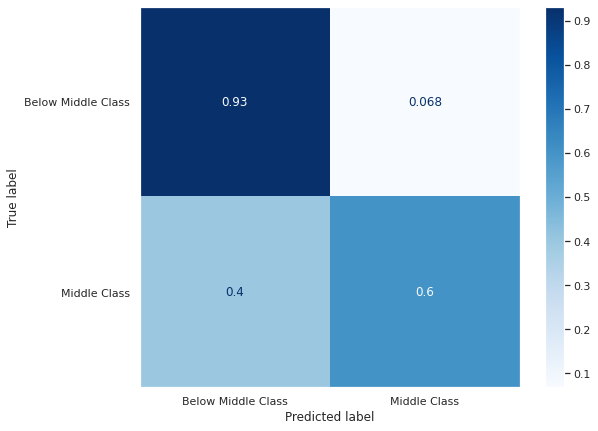

In [ ]:
#Importing ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred, normalize='true', cmap = 'Blues' );
plt.grid(None)

### Hyper Tuning Logistic Regression 

##### L1 Tuning
##### Solver = Saga

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test Scores:


{0.001: 0.7837195970845958,
 0.01: 0.8452215215789043,
 0.1: 0.8545573663090656,
 1.0: 0.8557857669314552,
 10.0: 0.8549668331831954,
 100.0: 0.8550487265580214,
 1000.0: 0.8550487265580214}

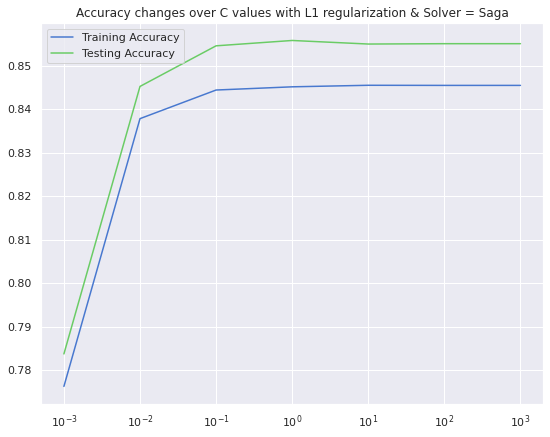

In [ ]:
#creating a list of C values and two empty lists for the scores
C_values = [0.001,0.01,0.1,1.0,10.0,100.0,1000.0]

#creating an emtpy train score variable
train_score = []

#creating an emtpy test score variable
test_score = []

#creating a loop to get the best c_value
for c in C_values:
  #Initializing logistic regression
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='saga', penalty='l1')
  #creating a pipeline
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  #fitting the model 
  log_reg_pipe.fit(X_train, y_train)
  #append the scores to train_score variable
  train_score.append(log_reg_pipe.score(X_train, y_train))
  #append the scores to test_score variable
  test_score.append(log_reg_pipe.score(X_test, y_test))

#plotting the scores.
fig, ax = plt.subplots(1,1)
ax.plot(C_values, train_score, label = 'Training Accuracy')
ax.plot(C_values, test_score, label = 'Testing Accuracy')
ax.set_xticks(C_values)
ax.set_title('Accuracy changes over C values with L1 regularization & Solver = Saga')
ax.legend()
ax.set_xscale('log')

#printing the resutls. 
print('Test Scores:')
{c:score for c,score in zip(C_values, test_score)}

C = 1.0 gave the best result at 0.855


##### L1 Tuning
##### Solver = liblinear

Test Scores:


{0.001: 0.7874866923265907,
 0.01: 0.8455490950782082,
 0.1: 0.8545573663090656,
 1.0: 0.8557857669314552,
 10.0: 0.8549668331831954,
 100.0: 0.8550487265580214,
 1000.0: 0.8550487265580214}

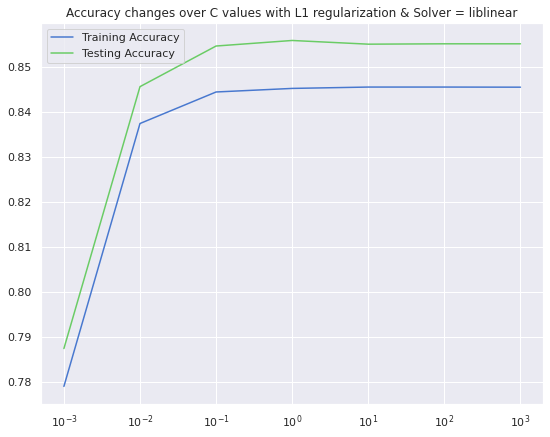

In [ ]:
#creating a list of C values and two empty lists for the scores
C_values = [0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
train_score = []
test_score = []

for c in C_values:
  #Initializing logistic regression
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  #creating a pipeline
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  #fitting the model 
  log_reg_pipe.fit(X_train, y_train)
  #append the scores to the train_score variable
  train_score.append(log_reg_pipe.score(X_train, y_train))
  #append the scores to the test_score variable
  test_score.append(log_reg_pipe.score(X_test, y_test))

#plotting the scores
fig, ax = plt.subplots(1,1)
ax.plot(C_values, train_score, label = 'Training Accuracy')
ax.plot(C_values, test_score, label = 'Testing Accuracy')
ax.set_xticks(C_values)
ax.set_title('Accuracy changes over C values with L1 regularization & Solver = liblinear')
ax.legend()
ax.set_xscale('log')
plt.savefig('workclass_maritalStatus_Hours_worked.png',bbox_inches = "tight", dpi = 'figure', transparent = False)

#printing the resutls. 
print('Test Scores:')
{c:score for c,score in zip(C_values, test_score)}

Best: C = 1.0 with accuracy of 0.855785

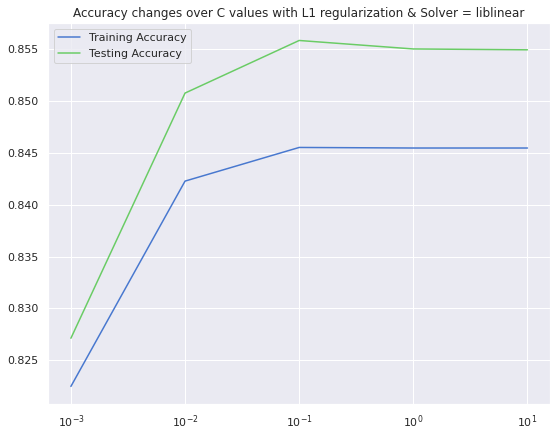

In [ ]:
#plotting the scores
fig, ax = plt.subplots(1,1)
ax.plot(C_values, train_score, label = 'Training Accuracy')
ax.plot(C_values, test_score, label = 'Testing Accuracy')
ax.set_xticks(C_values)
ax.set_title('Accuracy changes over C values with L1 regularization & Solver = liblinear')
ax.legend()
ax.set_xscale('log')
plt.savefig('liblinear_l1_log_graph.png',bbox_inches = "tight", dpi = 'figure', transparent = False)

#printing the resutls. 

##### L2 Tuning
##### Solver = Saga

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test Scores:


{0.001: 0.8281876996151012,
 0.01: 0.8508721644418966,
 0.1: 0.8558676603062813,
 1.0: 0.8551306199328474,
 10.0: 0.8549668331831954,
 100.0: 0.8550487265580214,
 1000.0: 0.8550487265580214}

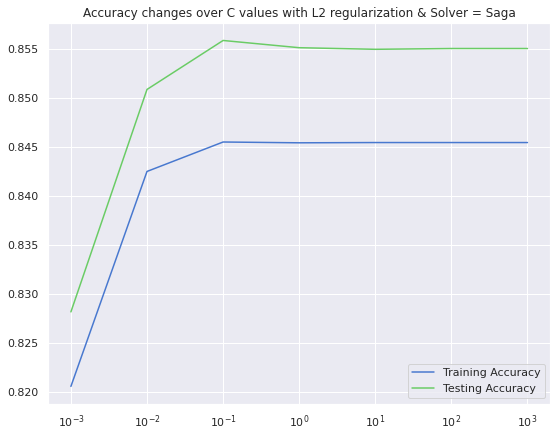

In [ ]:
#creating a list of C values and two empty lists for the scores
C_values = [0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
train_score = []
test_score = []

for c in C_values:
  #Initializing logistic regression
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='saga', penalty='l2')
  #creating a pipeline
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  #fitting the model 
  log_reg_pipe.fit(X_train, y_train)
  #append the scores to the train_score variable
  train_score.append(log_reg_pipe.score(X_train, y_train))
  #append the scores to the test_score variable
  test_score.append(log_reg_pipe.score(X_test, y_test))

#plotting the scores.
fig, ax = plt.subplots(1,1)
ax.plot(C_values, train_score, label = 'Training Accuracy')
ax.plot(C_values, test_score, label = 'Testing Accuracy')
ax.set_xticks(C_values)
ax.set_title('Accuracy changes over C values with L2 regularization & Solver = Saga')
ax.legend()
ax.set_xscale('log')

#printing the resutls. 
print('Test Scores:')
{c:score for c,score in zip(C_values, test_score)}

C = 0.1 with accuracy of 0.855867

##### L2 Tuning
##### Solver = Liblinear

Test Scores:


{0.001: 0.8271230857423635,
 0.01: 0.8507902710670707,
 0.1: 0.8558676603062813,
 1.0: 0.8550487265580214,
 10.0: 0.8549668331831954}

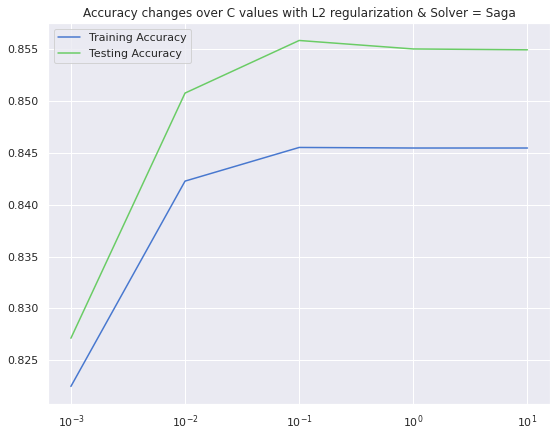

In [ ]:
#creating a list of C values and two empty lists for the scores
C_values = [0.001,0.01,0.1,1.0,10.0]
train_score = []
test_score = []

for c in C_values:
  #Initializing logistic regression
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  #creating a pipeline
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  #fitting the model 
  log_reg_pipe.fit(X_train, y_train)
  #append the scores to the train_score variable
  train_score.append(log_reg_pipe.score(X_train, y_train))
  #append the scores to the test_score variable
  test_score.append(log_reg_pipe.score(X_test, y_test))

#plotting the scores.
fig, ax = plt.subplots(1,1)
ax.plot(C_values, train_score, label = 'Training Accuracy')
ax.plot(C_values, test_score, label = 'Testing Accuracy')
ax.set_xticks(C_values)
ax.set_title('Accuracy changes over C values with L2 regularization & Solver = Saga')
ax.legend()
ax.set_xscale('log')

print('Test Scores:')
{c:score for c,score in zip(C_values, test_score)}

This model is very identical to the L2 and Saga model. They both have the same tragectory when it comes to their train and test score. 

#### All the models have a higher test score than its training score. With L2 penatly the difference between the best test and training score is larger than when penalty is equal to L1.  

### Logistic Regression Model Choice: 
- Penatly: L1
- C = 1.0
- Solver = liblinear

### Log Reg Tuned Model

In [ ]:
#initializing the model 
log_reg_tuned = LogisticRegression(C=1.0, max_iter=500, solver='liblinear', penalty='l1')

#making a pipeline
tuned_log_reg_pipeline = make_pipeline(preprocessor, log_reg_tuned)

#fitting the data
tuned_log_reg_pipeline.fit(X_train, y_train)

#predicting
tuned_log_pred_X_test = tuned_log_reg_pipeline.predict(X_test)

#printing prediction
tuned_log_pred_X_test

array(['Below Middle Class', 'Below Middle Class', 'Middle Class', ...,
       'Below Middle Class', 'Below Middle Class', 'Middle Class'],
      dtype=object)

In [ ]:
#confusion matrix
c_mat = confusion_matrix(y_test, tuned_log_pred_X_test, normalize='true')
#converting the matrix into a dataframe
cmat_df = pd.DataFrame(c_mat)
cmat_df

,0,1
0,0.932542,0.067458
1,0.395520,0.604480


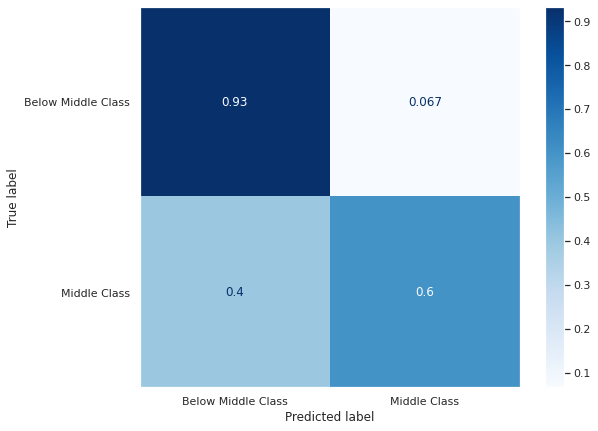

In [ ]:
#Importing ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, tuned_log_pred_X_test, normalize='true', cmap = 'Blues' );
plt.grid(None)
plt.savefig('confusion_matrix_tune_log.png',bbox_inches = "tight", dpi = 'figure', transparent = False)


This tuned logistic regression model is better than the defaul one as its False Positive and False Negatives are a little lower. 

## KNN

### KNN Default Model

In [ ]:
#importing KNN Classifier model. 
from sklearn.neighbors import KNeighborsClassifier

#initializing KNN models. 
knn = KNeighborsClassifier(n_neighbors=1)

#creating a pipeline 
knn_prep_pipe = make_pipeline(preprocessor, knn) 

#fitting the data 
knn_prep_pipe.fit(X_train, y_train) 

#making predictions 
knn_default_predictions_test = knn_prep_pipe.predict(X_test) 
knn_default_predictions_test

array(['Below Middle Class', 'Below Middle Class', 'Middle Class', ...,
       'Below Middle Class', 'Below Middle Class', 'Middle Class'],
      dtype=object)

In [ ]:
#printing the scores of both training and testing model 
print("Log default model train score" + " "+ str(knn_prep_pipe.score(X_train, y_train)))
print("Log default model test score" + " "+ str(knn_prep_pipe.score(X_test, y_test)))

Log default model train score 0.9699161912041714
Log default model test score 0.8081238227827369


In [ ]:
#creating a confusion matrix
knn_c_mat = confusion_matrix(y_test, knn_default_predictions_test, normalize='true')

#converting the matrix into a dataframe
cmat_df = pd.DataFrame(knn_c_mat)
cmat_df

,0,1
0,0.872675,0.127325
1,0.403220,0.596780


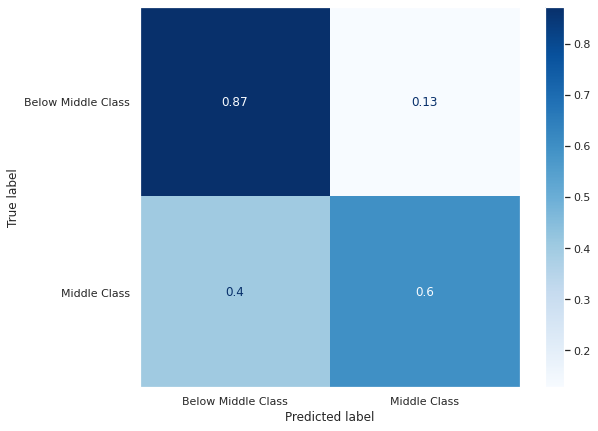

In [ ]:
#Importing ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, knn_default_predictions_test, normalize='true', cmap = 'Blues' );
plt.grid(None)

This model is better than the Log Reg models as the False Negative is lower. 

#### Tuning the KNN Model.

In [ ]:
#importing the accuracy score
from sklearn.metrics import accuracy_score 

#setting a knn range
knn_range = range(1,20)
#creating an empty test_accuracy variable
test_accuracy = []
#Setting best_accuracy and best_k variables to zero as they will be appended soon
best_accuracy = 0
best_k = 0

#creating a loop to find the best n_neighbors for the model. 
for k in knn_range:
  #initialing KNN
  knn = KNeighborsClassifier(n_neighbors=k)

  #creating the pipeline of preprocessor and KNN
  knn_prep_pipe = make_pipeline(preprocessor, knn)
  
  #fitting the model. 
  knn_prep_pipe.fit(X_train, y_train)

  #predicting and finding the accuracy of the model. 
  predict_test = knn_prep_pipe.predict(X_test)

  #creating an accuracy variable
  acc = accuracy_score(y_test, predict_test)

  #finding the best accuracy and the best k values
  if acc > best_accuracy:
    best_accuracy = acc
    best_k = k

  #appending the best values to test_accuracy
  test_accuracy.append(acc)


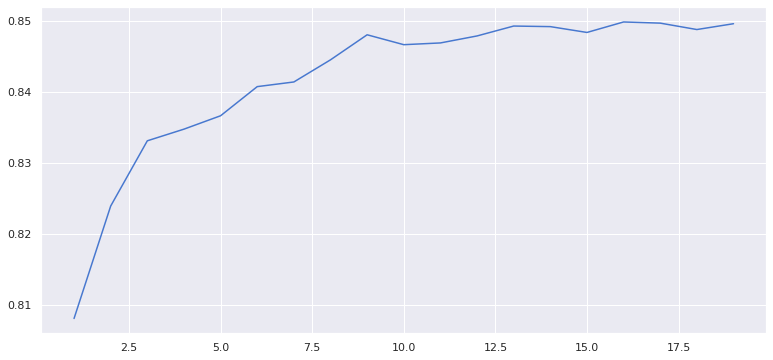

The best accuracy 0.8498075505691589. 
The best n_neighbor score 16. 


In [ ]:
#plotting the findings
plt.figure(figsize = (13,6))
plt.plot(knn_range, test_accuracy, label = 'Best KNN Scores')
plt.savefig('knn1_tuned_model.png',bbox_inches = "tight", dpi = 'figure', transparent = False)

plt.show()
#best k value and best accuracy
print(f'The best accuracy {best_accuracy}. \nThe best n_neighbor score {best_k}. ')


#printing the resutls. 

#### Creating the tuned KNN model.

In [ ]:
#creating a pipeline
tuned_knn_model = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors= 16))

#fitting the model 
tuned_knn_model.fit(X_train, y_train)

#making the predictions
tuned_knn_predict = tuned_knn_model.predict(X_test)
tuned_knn_predict

array(['Below Middle Class', 'Below Middle Class', 'Middle Class', ...,
       'Below Middle Class', 'Below Middle Class', 'Below Middle Class'],
      dtype=object)

In [ ]:
#creating a confusion matrix
tuned_knn_c_mat = confusion_matrix(y_test, tuned_knn_predict, normalize='true')

#converting the matrix into a dataframe
tuned_cmat_df = pd.DataFrame(tuned_knn_c_mat)
tuned_cmat_df

,0,1
0,0.924148,0.075852
1,0.407850,0.592150


Here the False Negative when down by 2 percent .

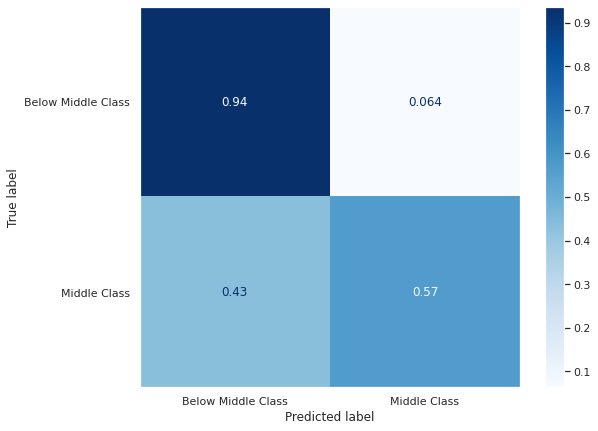

In [ ]:
#Importing ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix

ConfusionMatrixDisplay.from_predictions(y_test, tuned_knn_predict, normalize='true', cmap = 'Blues');
plt.grid(False)
plt.savefig('knn_confusion_matrix.png',bbox_inches = "tight", dpi = 'figure', transparent = False)

KNN is giving us a good model as well, but the False Negative is very high. 

### Best model with the lowest False Negative and False Positive:
#### **Logistic Regression** 
- Penatly: L1
- C = 1.0
- Solver = liblinear

## Using PCA
### Understanding that most of the columns are categorical, PCA won't be that helpful. However it is better than the default KNN model. 

In [ ]:
#creating a new copy of the df
df2 = df.copy()

df2.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [ ]:
df2.isna().sum()

age                  0
workclass          584
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation         585
relationship         0
race                 1
gender               1
capital-gain         1
capital-loss         1
hours-per-week       1
native-country     165
income               1
dtype: int64

#### Splitting data into feature and target

In [ ]:
#creating X and y 
df2_X = df2.drop(columns=['income'])
df2_y = df2['income']

df2_y.head()

0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: income, dtype: object

In [ ]:
df2_preprocessor = preprocessor.fit_transform(df2_X)


<9614x104 sparse matrix of type '<class 'numpy.float64'>'
	with 134593 stored elements in Compressed Sparse Row format>

In [ ]:
print(df2_preprocessor)

In [ ]:
#importing PCA
from sklearn.decomposition import PCA

#initializing pca
pca = PCA(n_components= 0.85)

pcs = pca.fit_transform(df2_preprocessor)

TypeError: ignored

### PCA did not work on this dataset.

## Creating a KMeans model

In [ ]:
#importing KMeans
from sklearn.cluster import KMeans

#creating a copy of the dataset. 
df3 = df2.copy()

df3.head(2)

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Net_Capital_Gain
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,Below Middle Class,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,Below Middle Class,0


In [ ]:
df3_preprocessed = preprocessor.fit_transform(df3)

In [ ]:
df3_preprocessed.shape

(48842, 107)

In [ ]:
#initializing KMeans
kmeans = KMeans(n_clusters=2)

In [ ]:
kmeans.fit(df3_preprocessed)

KMeans(n_clusters=2)

### Looking into the Inertia and Silhouetter Score to find the best number of clustes. 

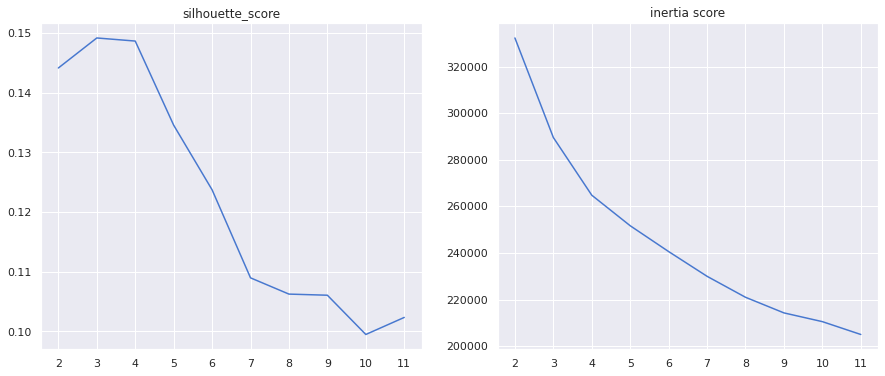

In [ ]:
from sklearn.metrics import silhouette_score

# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,12)
silh_score = []
inertias = []

#looping
for k in ks:
  kmeans = KMeans(n_clusters = k, random_state= 42)
  kmeans.fit(df3_preprocessed)
  #append silhouette_score
  silh_score.append(silhouette_score(df3_preprocessed, kmeans.labels_))
  #append inertia
  inertias.append(kmeans.inertia_)

#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize = (15,6))
axes[0].plot(ks, silh_score)
axes[0].set_title('silhouette_score')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('inertia score')
axes[1].set_xticks(ks)

Looking at the Silhouette Score and Inertia, I will go with 4 clusters as it seem to have a high Silhouette Score and the diminishing returns for the inertia starts to happen after 4 clusters. 

#### Creating a Kmeans model with 4 clusters. 

In [ ]:
#initializing KMeans
kmeans = KMeans(n_clusters=4)

kmeans.fit(df3_preprocessed)

df3['cluster'] = kmeans.labels_

df3['cluster'].value_counts()

cluster_group = df3.groupby('cluster', as_index = False).mean()
cluster_group

,cluster,age,hours-per-week,Net_Capital_Gain
0,0,51.145216,35.495805,414.169404
1,1,26.183065,36.237516,129.100046
2,2,46.610656,50.475410,99999.000000
3,3,42.467826,46.755982,861.171024


The cluster shows us the four groups we can see that dataset in. This clustering shows clearly that the most hours per week spent on the job meant you have a higher Capital Gain. This also happened during the time the indiviudal was in his mid fourties. The clustering also shows us that young workers and old workers worked less than the rest, this could be dedicated to that fact the young individuals are just starting their careers and old ones are wrapping it up. 

### Using Ordinal Encoder to see if we can build a better model. 

In [ ]:
#importing Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

#initiating Ordinal Encoder
OE = OrdinalEncoder()

OE

OrdinalEncoder()

In [ ]:
#numeric pipeline
numeric_pipeline = make_pipeline(mean_imputer, scaler)

#categorical pipeline
OE_categorical_pipeline = make_pipeline(most_imputer, OrdinalEncoder())

In [ ]:
OE_categorical_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder', OrdinalEncoder())])

In [ ]:
#numeric tuple
num_tuple = (mean_imputer,numeric_selector)
#OE categorical tuple 
OE_cat_tuple = (OE_categorical_pipeline, categorical_selector)

OE_cat_tuple

(Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordinalencoder', OrdinalEncoder())]),
 <sklearn.compose._column_transformer.make_column_selector at 0x7f48d4d60190>)

In [ ]:
#OE preprocessor 
OE_preprocessor = make_column_transformer(num_tuple, OE_cat_tuple, remainder= 'passthrough')

OE_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('simpleimputer', SimpleImputer(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f48d4d605e0>),
                                ('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f48d4d60190>)])

### Creating Log Reg Model with Ordinal Encoder. 
#### I will be using the already tuned Logistic Regression model. 

In [ ]:
#initializing the model 
log_reg_tuned = LogisticRegression(C=0.1, max_iter=1000, solver='liblinear', penalty='l2')

#making a pipeline
tuned_log_reg_pipeline = make_pipeline(OE_preprocessor, log_reg_tuned)

#fitting the data
tuned_log_reg_pipeline.fit(X_train, y_train)

#predicting
tuned_log_pred_X_test = tuned_log_reg_pipeline.predict(X_test)

#printing prediction
tuned_log_pred_X_test

array(['Below Middle Class', 'Below Middle Class', 'Middle Class', ...,
       'Below Middle Class', 'Below Middle Class', 'Middle Class'],
      dtype=object)

In [ ]:
#confusion matrix
c_mat = confusion_matrix(y_test, tuned_log_pred_X_test, normalize='true')
#converting the matrix into a dataframe
cmat_df = pd.DataFrame(c_mat)
cmat_df

,0,1
0,0.963438,0.036562
1,0.746237,0.253763


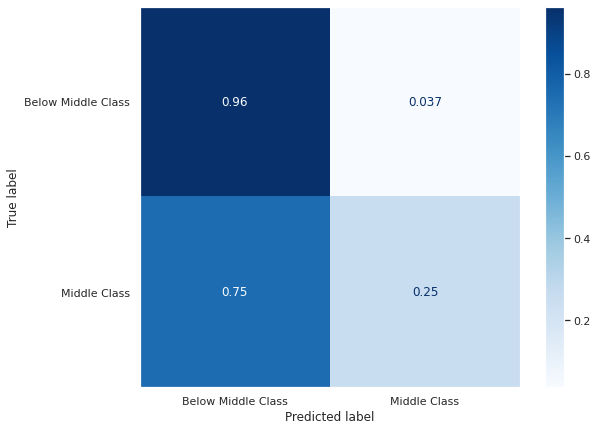

In [ ]:
#Importing ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, tuned_log_pred_X_test, normalize='true', cmap = 'Blues' );
plt.grid(None)

This was a worse model than the one we did with One Hot Encoder. False Negative is through the roof. 

### Trying the same thing with KNN model as well. Using the tuned KNN model. 

In [ ]:
#creating a pipeline
OE_knn_model = make_pipeline(OE_preprocessor, KNeighborsClassifier(n_neighbors= 15))

#fitting the model 
OE_knn_model.fit(X_train, y_train)

#making the predictions
OE_tuned_knn_predict = OE_knn_model.predict(X_test)
OE_tuned_knn_predict

array(['Below Middle Class', 'Below Middle Class', 'Middle Class', ...,
       'Below Middle Class', 'Below Middle Class', 'Below Middle Class'],
      dtype=object)

In [ ]:
#creating a confusion matrix
OE_tuned_knn_c_mat = confusion_matrix(y_test, OE_tuned_knn_predict, normalize='true')

#converting the matrix into a dataframe
OE_tuned_cmat_df = pd.DataFrame(tuned_knn_c_mat)
OE_tuned_cmat_df

,0,1
0,0.924148,0.075852
1,0.407850,0.592150


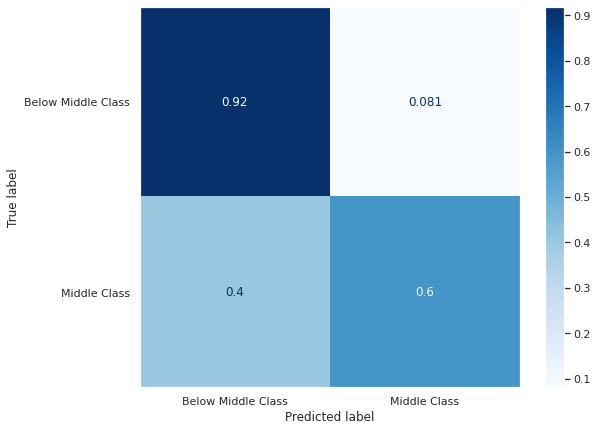

In [ ]:
#Importing ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, OE_tuned_knn_predict, normalize='true', cmap = 'Blues' );
plt.grid(None)

This model is worse than the tuned Log Reg model with One Hot Encoder. 

### Clustering with OneHotEncode

In [ ]:
#importing KMeans
from sklearn.cluster import KMeans

#creating a copy of the dataset. 
df3 = df2.copy()

df3.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Net_Capital_Gain
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,Below Middle Class,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,Below Middle Class,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,Middle Class,0
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,Middle Class,7688
4,18,?,Some-college,Never-married,?,Own-child,White,Female,30,United-States,Below Middle Class,0


In [ ]:
df3_preprocessed = OE_preprocessor.fit_transform(df3)

df3_preprocessed.shape

(48842, 12)

In [ ]:
df3_p = pd.DataFrame(data=df3_preprocessed, columns= df3.columns)

df3_p.tail()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Net_Capital_Gain
48837,27.0,38.0,0.0,4.0,7.0,2.0,13.0,5.0,4.0,0.0,39.0,0.0
48838,40.0,40.0,0.0,4.0,11.0,2.0,7.0,0.0,4.0,1.0,39.0,1.0
48839,58.0,40.0,0.0,4.0,11.0,6.0,1.0,4.0,4.0,0.0,39.0,0.0
48840,22.0,20.0,0.0,4.0,11.0,4.0,1.0,3.0,4.0,1.0,39.0,0.0
48841,52.0,40.0,15024.0,5.0,11.0,2.0,4.0,5.0,4.0,0.0,39.0,1.0


#### Education colume is behaving weird, so I will be dropping it. 

In [ ]:
df3_p.drop(columns = ['education'], axis = 1, inplace = True )

In [ ]:
df3_p.head(2)

,age,workclass,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Net_Capital_Gain
0,25.0,40.0,4.0,1.0,4.0,7.0,3.0,2.0,1.0,39.0,0.0
1,38.0,50.0,4.0,11.0,2.0,5.0,0.0,4.0,1.0,39.0,0.0


In [ ]:
#initializing KMeans
kmeans = KMeans(n_clusters=4)

kmeans.fit(df3_p)

df3_p['cluster'] = kmeans.labels_

df3_p['cluster'].value_counts()

2    22168
0    15242
1     8925
3     2507
Name: cluster, dtype: int64

In [ ]:
df3_p.head()

,age,workclass,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Net_Capital_Gain,cluster
0,25.0,40.0,4.0,1.0,4.0,7.0,3.0,2.0,1.0,39.0,0.0,2
1,38.0,50.0,4.0,11.0,2.0,5.0,0.0,4.0,1.0,39.0,0.0,1
2,28.0,40.0,2.0,7.0,2.0,11.0,0.0,4.0,1.0,39.0,1.0,2
3,44.0,40.0,4.0,15.0,2.0,7.0,0.0,2.0,1.0,39.0,1.0,0
4,18.0,30.0,0.0,15.0,4.0,0.0,3.0,4.0,0.0,39.0,0.0,2


In [ ]:
cluster_group = df3_p.groupby('cluster', as_index = False).mean()
cluster_group

,cluster,age,workclass,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Net_Capital_Gain
0,0,53.446070,37.341425,3.789201,10.157197,2.234221,6.324629,1.139745,3.683178,0.674911,38.460241,0.310589
1,1,39.393389,57.056246,4.226106,10.717311,2.222521,7.403473,0.802353,3.812101,0.836639,38.524930,0.434734
2,2,28.123331,35.875135,3.777652,10.268360,3.035276,6.383255,1.906577,3.644758,0.595633,38.339543,0.111061
3,3,39.003191,40.145592,3.918628,9.736737,2.684085,6.895892,1.473873,3.269246,0.674910,5.965297,0.243718


Nothing of value was found. 